In [1]:
import random
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import product
from specs import *

In [2]:
random.seed(42)

## import trials

In [3]:
import json

with open("C:/Users/Sarah Zheng/dev/cards-deception/cards-game/src/assets/trials_40shuffled.json", "r") as read_file:
    trials_source = json.load(read_file)

In [4]:
trials_source[0:5]

[{'n_red': 1, 'outcome': -1},
 {'n_red': 3, 'outcome': -1},
 {'n_red': 2, 'outcome': 1},
 {'n_red': 1, 'outcome': -1},
 {'n_red': 2, 'outcome': -1}]

In [5]:
trials = []
for trial in trials_source:
    trials.append(Trial(n_red=trial['n_red'], outcome=trial['outcome']))

In [6]:
trials200 = trials_source * 5

In [7]:
trials200_noshuffle = []
for trial in trials200:
    trials200_noshuffle.append(Trial(n_red=trial['n_red'], outcome=trial['outcome']))

In [8]:
random.shuffle(trials200)

trials200_shuffled = []

for trial in trials200:
    trials200_shuffled.append(Trial(n_red=trial['n_red'], outcome=trial['outcome']))

## agent parameter initialization

In [9]:
# simulate multiple different players
alpha = np.linspace(0.1, 1, 10)
s0 = [-1, -0.6, -0.4, -0.2, 0.2, 0.4, 0.6, 1]

params = (list(product(alpha, s0)))

In [10]:
len(params) # == len(alpha) * len(s0)

80

In [11]:
players = []
for param in params:
    players.append(Player(alpha=param[0], pre_suspicion=param[1]))

## generate simulated data

In [12]:
# generate simulated suspicion values for agent 1
simulated_suspicion_values = []
simulated_suspicion_ratings = []
simulation_logs = []

ip=58

for i in range(10):
    g = Game(trials, players[ip])
    g.simulate_signed(verbose=False, save=False, add_noise=True, set_noise=0.01) # note: more noise will worsen recovery
    simulated_suspicion_values.append(g.suspicion_values)
    simulation_logs.append(g.sim_log)
    simulated_suspicion_ratings.append(g.suspicion_to_honesty_rating())

starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.028509675194035883 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32

[Text(0.5, 0, 'trials'), Text(0, 0.5, 'unsigned suspicion value'), (-2.0, 2.0)]

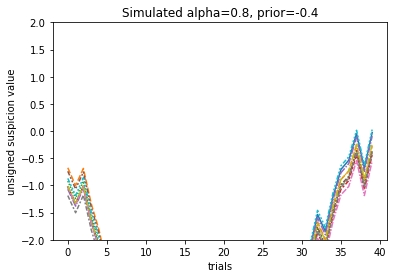

In [13]:
# plot noisy iterations for same agent
ax = sns.lineplot(data=simulated_suspicion_values, legend=False)
ax.set_title("Simulated alpha="+str(params[ip][0])+", prior="+str(params[ip][1]))
ax.set(xlabel='trials', ylabel='unsigned suspicion value', ylim=(-2,2))

[Text(0.5, 0, 'trials'), Text(0, 0.5, 'unsigned suspicion value'), (0.0, 1.0)]

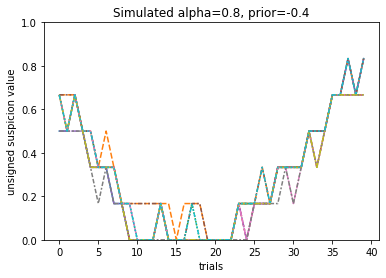

In [14]:
# plot noisy iterations for same agent
ax = sns.lineplot(data=simulated_suspicion_ratings, legend=False)
ax.set_title("Simulated alpha="+str(params[ip][0])+", prior="+str(params[ip][1]))
ax.set(xlabel='trials', ylabel='unsigned suspicion value', ylim=(0,1))

In [15]:
# generate simulated suspicion values for each initialized agent
simulated_suspicion_values = []
simulated_suspicion_ratings = []
simulation_logs = []

for player in players:
    g = Game(trials, player)
    g.simulate_signed(verbose=False, save=False, add_noise=True, set_noise=0.01) # note: more noise will worsen recovery
    simulated_suspicion_values.append(g.suspicion_values)
    simulation_logs.append(g.sim_log)
    simulated_suspicion_ratings.append(g.suspicion_to_honesty_rating())

starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial: 

player attributes: prior: 0.4 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
tria

trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:

[Text(0.5, 0, 'trials'), Text(0, 0.5, 'unsigned suspicion value')]

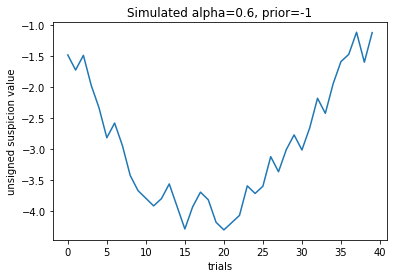

In [16]:
i = 40

ax = sns.lineplot(data=simulated_suspicion_values[i], legend=False)
ax.set_title("Simulated alpha="+str(params[i][0])+", prior="+str(params[i][1]))
ax.set(xlabel='trials', ylabel='unsigned suspicion value') #ylim=(-2,2))

[Text(0.5, 0, 'trials'), Text(0, 0.5, 'unsigned suspicion value'), (0.0, 1.0)]

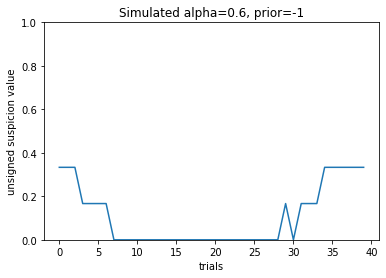

In [17]:
ax = sns.lineplot(data=simulated_suspicion_ratings[i], legend=False)
ax.set_title("Simulated alpha="+str(params[i][0])+", prior="+str(params[i][1]))
ax.set(xlabel='trials', ylabel='unsigned suspicion value', ylim=(0,1))

## recover parameters

### using grid search

In [62]:
best_param_sv = []
all_residuals_sv = []
all_R2_sv = []
best_param_sv_SSE = []
best_param_sv_R2 = []

best_param_sv_rating = []
all_residuals_sv_rating = []
all_R2_sv_rating = []
best_param_sv_rating_SSE = []
best_param_sv_rating_R2 = []

for p, data in enumerate(simulated_suspicion_ratings):
    generated_suspicion = np.array(pd.DataFrame(simulation_logs[p])['suspicion_t'])
    SSres_sv = []
    SStot_sv = []
    generated_suspicion_ratings = np.array(data)
    SSres_sv_rating = []
    SStot_sv_rating = []
    
    for i, param in enumerate(params):
        g = Game(trials, Player(alpha=param[0], pre_suspicion=param[1]))
        g.simulate_signed(verbose=False, save=False, add_noise=False)
        
        sv = np.array(g.suspicion_values)
        residuals_sv = np.sum((generated_suspicion-sv)**2)
        SSres_sv.append(residuals_sv)
        totals_sv = np.sum(np.array(generated_suspicion-generated_suspicion.mean())**2)
        SStot_sv.append(totals_sv)
        
        sv_rating = g.suspicion_to_honesty_rating()
        residuals_sv_rating = np.sum((generated_suspicion_ratings-sv_rating)**2)
        SSres_sv_rating.append(residuals_sv_rating)
        totals_sv_rating = np.sum(np.array(generated_suspicion_ratings-generated_suspicion_ratings.mean())**2)
        SStot_sv_rating.append(totals_sv_rating)
    
    R2_sv = 1 - np.array(SSres_sv)/np.array(SStot_sv)
    R2_sv_rating = 1 - np.array(SSres_sv_rating)/np.array(SStot_sv_rating)
    
    all_residuals_sv.append(SSres_sv)
    all_R2_sv.append(R2_sv)
    best_idx_sv = np.array(SSres_sv).argmin()
    best_param_sv.append(params[best_idx_sv])
    best_param_sv_SSE.append(np.array(SSres_sv).min())
    best_param_sv_R2.append(R2_sv[best_idx_sv])
    
    all_residuals_sv_rating.append(SSres_sv_rating)
    all_R2_sv_rating.append(R2_sv_rating)
    best_idx_sv_rating = np.array(SSres_sv_rating).argmin()
    best_param_sv_rating.append(params[best_idx_sv_rating])
    best_param_sv_rating_SSE.append(np.array(SSres_sv_rating).min())
    best_param_sv_rating_R2.append(R2_sv_rating[best_idx_sv_rating])

starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial: 

trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.2 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:

trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player att

trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  1

<ipython-input-62-88386a37b3c3>:38: RuntimeWarning: divide by zero encountered in true_divide
  R2_sv_rating = 1 - np.array(SSres_sv_rating)/np.array(SStot_sv_rating)
<ipython-input-62-88386a37b3c3>:38: RuntimeWarning: invalid value encountered in true_divide
  R2_sv_rating = 1 - np.array(SSres_sv_rating)/np.array(SStot_sv_rating)


trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.2 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:

trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial

trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
tr

trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
p

trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting g

trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial: 

starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial: 

trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.

trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial: 

trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes:

trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20

trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play s

trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.2 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial: 

trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed 

trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.2 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial: 

trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11

starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial: 

trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial: 

trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game


trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial: 

starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial: 

trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial

trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.2 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial

trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player at

trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial

trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 a

trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed s

starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial: 

end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  3

trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.2 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial: 

trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.2 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial: 

trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  2

trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game p

player attributes: prior: -0.6 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial

trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  2

trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial

trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:

trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial

trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16

trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  

trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial

trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.2 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  

trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:

trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.2 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:

trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of si

trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.2 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  1

trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
tria

trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial

trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.2 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
play

trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.2 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial: 

trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial

trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated 

trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial

trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation w

trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial

trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11

trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.2 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.5
trial:  1
trial:  2


trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial: 

trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
t

trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial: 

trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial: 

trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial: 

trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player at

trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial: 

trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial

trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 0.5


player attributes: prior: -1 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
tria

trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simu

trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.2 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:

trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 a

player attributes: prior: 1 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
tr

trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.2 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.

trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12

trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  

trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial: 

trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player at

player attributes: prior: -1 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
tria

starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.2 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  3

trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  2

trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.2 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
tr

trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play s

player attributes: prior: -0.6 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
tr

trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial: 

trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial

trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 0.1


trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial

trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
t

trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 

trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.2 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:

trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion


trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.2 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.2
trial:  1
trial:  2
trial:  3
t

trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial

trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
tria

trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:

trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:

trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.2 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial: 

starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  

trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24

player attributes: prior: 0.2 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
tria

trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial

trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial: 

starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial: 

trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  2

trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0

trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.2 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:

trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
tr

starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.2 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:

trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial: 

trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.2 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial: 

trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation wi

end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial

starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  3

trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
tria

trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.30000000000000004
trial:  1
trial:  2
t

trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
tr

trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.2 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial: 

trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial: 

trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial: 

trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial: 

trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.2 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game p

trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:

trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial

trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial

trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.2 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attribu

starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial: 

trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial: 

trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
tria

trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player a

starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  3

trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial

trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
p

trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial

trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17

trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial: 

trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial: 

trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial

trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion

trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: 

trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial: 

trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  

trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.2 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.

trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
sta

trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.2 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  

starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:

trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial

trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.300000

trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of 

trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial

trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  

trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:

trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.2 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:

trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial: 

trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed sus

starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34

trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial: 

trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation 

trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial: 

trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15

trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial

trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial

trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting ga

player attributes: prior: -0.6 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
tr

trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  1

trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial: 

trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 

trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
p

trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.2 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:

starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  3

trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.2 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion

trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion

trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting g

trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial: 

starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  3

trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.2 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial: 

player attributes: prior: -0.2 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.2 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
tria

starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.2 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  3

trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicio

trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial: 

starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial

trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation wi

player attributes: prior: -0.6 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
tr

trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial

trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial

trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 

trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial

trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:

trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.2 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial: 

trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial: 

starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:

trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial: 

trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play s

trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  

trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.2 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
tri

trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13

trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting gam

trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.2 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  2

trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 1.0
trial:  1
trial:  2
trial:  3
tri

starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.2 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:

trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
t

player attributes: prior: -1 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
tria

trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial: 

trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial

trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 0.1
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attr

end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial: 

trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.2 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.8
trial:  1
trial:  2
trial:  3
trial:  4
tr

trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.2 alpha: 0.2
trial:  1
trial:  2

trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:

trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial

trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial: 

trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: 

trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial: 

trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.2 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:

end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -1 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial: 

trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial

trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  2

trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial: 

trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial

trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.2 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.2
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial: 

trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 0.5
trial:  1
trial:  2
trial:  3
trial:  4
tria

trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
tri

trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:

starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.6
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial: 

trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 1 alpha: 0.9
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  2

starting game play simulation with signed suspicion
player attributes: prior: 0.2 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 0.30000000000000004
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  

trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.2 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial: 

trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial: 

trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.6 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: -0.4 alpha: 0.4
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial

trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.2 alpha: 0.7000000000000001
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with s

starting game play simulation with signed suspicion
player attributes: prior: 0.4 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial:  34
trial:  35
trial:  36
trial:  37
trial:  38
trial:  39
trial:  40
end of simulated game
starting game play simulation with signed suspicion
player attributes: prior: 0.6 alpha: 1.0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19
trial:  20
trial:  21
trial:  22
trial:  23
trial:  24
trial:  25
trial:  26
trial:  27
trial:  28
trial:  29
trial:  30
trial:  31
trial:  32
trial:  33
trial: 

In [63]:
# sanity check
len(best_param_sv_R2) == len(players)

True

In [64]:
estimated_alpha = [np.round(x[0], 1) for x in best_param_sv]
estimated_alpha_rating = [np.round(x[0], 1) for x in best_param_sv_rating]
generated_alpha = [np.round(x[0], 1) for x in params]

estimated_s0 = [x[1] for x in best_param_sv]
estimated_s0_rating = [x[1] for x in best_param_sv_rating]
generated_s0 = [x[1] for x in params]

Text(0.5, 1.0, 'Joint distribution of alpha and s0')

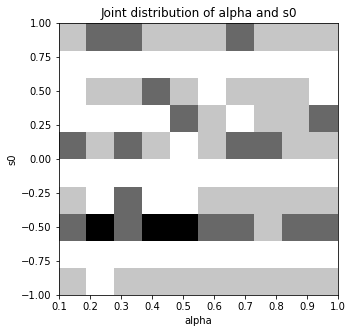

In [65]:
# 2D histogram of alpha and s0 parameter estimates
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.hist2d(x=estimated_alpha, y=estimated_s0, cmap=plt.cm.Greys)
ax.set_xlabel("alpha")
ax.set_ylabel("s0")
ax.set_title("Joint distribution of alpha and s0")

<AxesSubplot:ylabel='Density'>

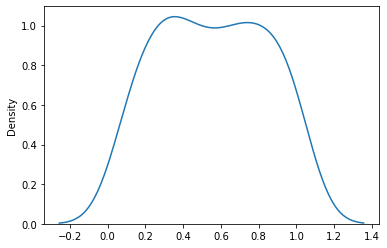

In [66]:
# sanity check: are estimated values of players in expected distribution?
sns.kdeplot(x=estimated_alpha)

<AxesSubplot:ylabel='Density'>

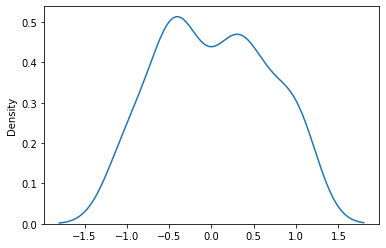

In [67]:
# sanity check: are estimated values of players in expected distribution?
sns.kdeplot(x=estimated_s0)

In [68]:
tmp = pd.DataFrame({'alpha': estimated_alpha, 's0': estimated_s0, 'SSE': best_param_sv_SSE, 'R2': best_param_sv_R2})
tmp.shape

(80, 4)

In [69]:
tmp = pd.pivot_table(data=tmp,
                      index='alpha',
                      values='R2',
                      columns='s0',
                      dropna=False)

Text(0.5, 1.0, 'R2 from param estimates on simulated suspicion values')

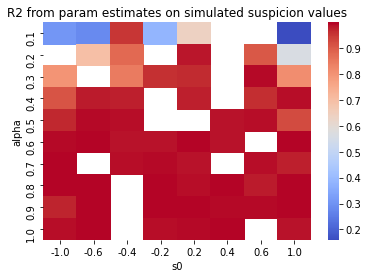

In [70]:
p = sns.heatmap(data=tmp, cmap="coolwarm", square=False)
p.set_title("R2 from param estimates on simulated suspicion values")

In [71]:
tmp = pd.DataFrame({'alpha': estimated_alpha_rating, 's0': estimated_s0_rating, 'SSE': best_param_sv_rating_SSE, 'r2': best_param_sv_rating_R2})
tmp.shape

(80, 4)

In [72]:
tmp = pd.pivot_table(data=tmp,
                      index='alpha',
                      values='r2',
                      columns='s0',
                      dropna=False)

Text(0.5, 1.0, 'R2 from param estimates on simulated ratings')

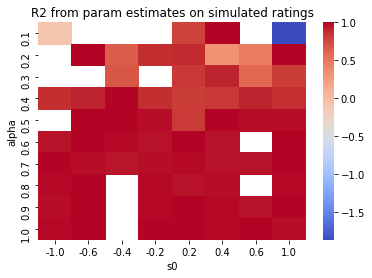

In [73]:
p = sns.heatmap(data=tmp, cmap="coolwarm", square=False)
p.set_title("R2 from param estimates on simulated ratings")

In [74]:
len(estimated_alpha) == len(generated_alpha)

True

<AxesSubplot:>

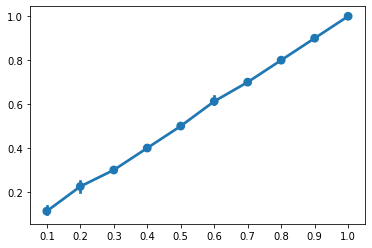

In [75]:
sns.pointplot(x=generated_alpha, y=estimated_alpha)

<AxesSubplot:>

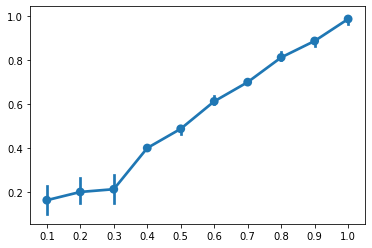

In [76]:
sns.pointplot(x=generated_alpha, y=estimated_alpha_rating)

<AxesSubplot:>

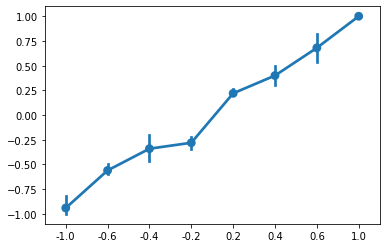

In [77]:
sns.pointplot(x=generated_s0, y=estimated_s0)

<AxesSubplot:>

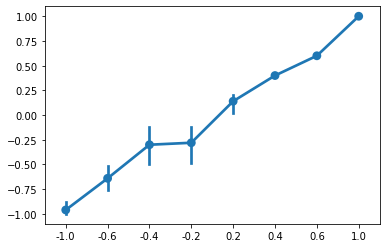

In [78]:
sns.pointplot(x=generated_s0, y=estimated_s0_rating)

### using MCMC

In [36]:
from mcmc import *

In [ ]:
activity = simulated_suspicion_values[0]
accepted, rejected = metropolis_hastings(manual_log_like_normal,prior,transition_model,(2,1), 50000,activity,acceptance)